In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfnew = pd.read_csv('no_outlier.csv', sep=';')

In [3]:
i=0
for record in dfnew['Age']:
    dfnew.at[i, 'Age'] = record / 10
    i+=1
    
dfnew

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37.0,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30.0,2,50.0,2,2,3
1,NaN,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20.0,3,40.0,0,0,4
2,36.0,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,NaN,1,60.0,0,0,0
3,24.0,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30.0,2,60.0,5,0,1
4,58.0,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30.0,2,60.0,12,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,28.0,No,NaN,202,Sales,2,1,Technical Degree,3,Male,...,1,800.0,1,1,50.0,3,40.0,0,0,0
1009,35.0,Yes,Travel_Rarely,350,Sales,5,3,Marketing,4,Male,...,2,800.0,0,1,30.0,3,70.0,0,0,0
1010,41.0,Yes,Travel_Frequently,703,Sales,2,3,Life Sciences,3,Male,...,3,NaN,0,3,50.0,4,80.0,0,0,0
1011,NaN,Yes,Travel_Rarely,337,Sales,7,1,Marketing,2,Female,...,2,800.0,0,1,NaN,3,10.0,0,1,0


In [4]:
i = 0
for record in dfnew['MonthlyIncome']:
    dfnew.at[i, 'MonthlyIncome']= record /10
    i+=1
    
dfnew

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37.0,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30.0,2,50.0,2,2,3
1,NaN,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20.0,3,40.0,0,0,4
2,36.0,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,NaN,1,60.0,0,0,0
3,24.0,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30.0,2,60.0,5,0,1
4,58.0,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30.0,2,60.0,12,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,28.0,No,NaN,202,Sales,2,1,Technical Degree,3,Male,...,1,800.0,1,1,50.0,3,40.0,0,0,0
1009,35.0,Yes,Travel_Rarely,350,Sales,5,3,Marketing,4,Male,...,2,800.0,0,1,30.0,3,70.0,0,0,0
1010,41.0,Yes,Travel_Frequently,703,Sales,2,3,Life Sciences,3,Male,...,3,NaN,0,3,50.0,4,80.0,0,0,0
1011,NaN,Yes,Travel_Rarely,337,Sales,7,1,Marketing,2,Female,...,2,800.0,0,1,NaN,3,10.0,0,1,0


In [5]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'correlation' is not defined

<AxesSubplot:>

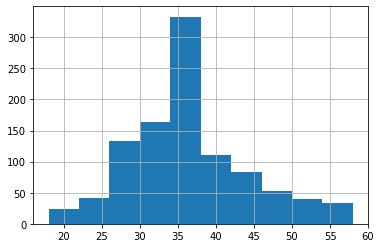

In [5]:
dfnew["Age"].fillna(dfnew["Age"].mean(), inplace=True)


dfnew['Age'].hist()

In [6]:
#funzione per aggiornare i valori mancanti di BT con il valore più frequente
i = 0
for record in dfnew['BusinessTravel']:
    if not pd.notnull(record):
        dfnew.at[i, 'BusinessTravel'] = "Travel_Rarely"
    i += 1
dfnew['BusinessTravel'].isnull().sum()

0

In [7]:
#funzione per aggiornare i valori mancanti di Gender con ND
i = 0
for record in dfnew['Gender']:
    if not pd.notnull(record):
        dfnew.at[i, 'Gender'] = "ND"
    i += 1
dfnew['Gender'].isnull().sum()

0

In [10]:
#funzione per aggiornare i valori mancanti tramite la Y
i=0
X = dfnew.values
for record in dfnew['MonthlyIncome']:
    if not pd.notnull(record):
        record = 391.4 * X[i, 29] + 3763.8
        dfnew.at[i, 'MonthlyIncome'] = record
    i += 1

dfnew['MonthlyIncome'].isnull().sum()

0

In [9]:
#funzione per trattare i valori mancanti di yearsatcompany
i = 0
for record in dfnew['YearsAtCompany']:
    if not pd.notnull(record):
        if dfnew.at[i,'Age'] < 21:
            dfnew.at[i, 'YearsAtCompany']= 1
        elif dfnew.at[i,'Age'] < 31:
            dfnew.at[i, 'YearsAtCompany']= 3
        elif dfnew.at[i,'Age'] < 41:
            dfnew.at[i, 'YearsAtCompany']= 10
        elif dfnew.at[i,'Age'] < 51:
            dfnew.at[i, 'YearsAtCompany']= 8
        elif dfnew.at[i,'Age'] < 61:
            dfnew.at[i, 'YearsAtCompany']= 10
    i += 1
    
dfnew['YearsAtCompany'].isnull().sum()

0

In [11]:
#riempire i Nan di TrainingTimesLastYear con la moda 
i = 0
for record in dfnew['TrainingTimesLastYear']:
    if not pd.notnull(record):
        if dfnew.at[i, 'Department'] == "Human Resources":
            dfnew.at[i, 'TrainingTimesLastYear'] = 3.0
        elif dfnew.at[i, 'Department'] == "Research & Development":
            dfnew.at[i, 'TrainingTimesLastYear'] = 2.0
        elif dfnew.at[i, 'Department'] == "Sales":
            dfnew.at[i, 'TrainingTimesLastYear'] = 2.0
    i += 1
dfnew['TrainingTimesLastYear'].isnull().sum()

0

In [13]:
dfnew.to_csv('Train_no_MissingValues.csv', index=False)

In [28]:
i = 0
for record in dfnew['YearsWithCurrManager']:
    if record > dfnew.at[i, 'YearsAtCompany']:
        sostituzione = dfnew.at[i, 'YearsAtCompany']
        dfnew.at[i, 'YearsWithCurrManager'] = sostituzione
    i+=1
    
c = 0
for record in dfnew['YearsSinceLastPromotion']:
    if record > dfnew.at[c, 'YearsAtCompany']:
        sostituzione = dfnew.at[c, 'YearsAtCompany']
        dfnew.at[c, 'YearsSinceLastPromotion'] = sostituzione
    c+=1
    
    
i = 0
for record in dfnew['YearsInCurrentRole']:
    if record > dfnew.at[i, 'YearsAtCompany']:
        sostituzione = dfnew.at[i, 'YearsAtCompany']
        dfnew.at[i, 'YearsInCurrentRole'] = sostituzione
    i+=1

i = 0
for record in dfnew['YearsAtCompany']:
    if record > dfnew.at[i, 'TotalWorkingYears'] and dfnew.at[i, 'NumCompaniesWorked'] == 0:
        sostituzione = dfnew.at[i, 'TotalWorkingYears']
        dfnew.at[i, 'YearsAtCompany'] = sostituzione
    i+=1
    
i = 0
for record in dfnew['YearsAtCompany']:
    if record > dfnew.at[i, 'TotalWorkingYears'] and dfnew.at[i, 'NumCompaniesWorked'] != 0:
        sostituzione = dfnew.at[i, 'TotalWorkingYears']
        dfnew.at[i, 'YearsAtCompany'] = sostituzione
        dfnew.at[i, 'NumCompaniesWorked'] = 0
    i+=1

In [17]:
dfnew.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37.000000,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30.0,2,10.0,2,2,3
1,36.008197,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20.0,3,40.0,0,0,4
2,36.000000,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,2.0,1,60.0,0,0,0
3,24.000000,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30.0,2,60.0,5,0,1
4,58.000000,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30.0,2,60.0,12,12,8


In [18]:
dfnew['YearsAtCompany']

0        10.0
1        40.0
2        60.0
3        60.0
4        60.0
        ...  
1008     40.0
1009     70.0
1010     80.0
1011     10.0
1012    100.0
Name: YearsAtCompany, Length: 1013, dtype: float64

In [37]:
i = 0
for record in dfnew['YearsAtCompany']:
    dfnew.at[i, 'YearsAtCompany']= record *10
    i+=1
    
dfnew

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30.0,2,10.0,2,2,3
1,36,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20.0,3,24.0,0,0,4
2,36,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,2.0,1,15.0,0,0,0
3,24,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30.0,2,6.0,5,0,1
4,58,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30.0,2,23.0,12,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,28,No,Travel_Rarely,202,Sales,2,1,Technical Degree,3,Male,...,1,800.0,1,1,50.0,3,1.0,0,0,0
1009,35,Yes,Travel_Rarely,350,Sales,5,3,Marketing,4,Male,...,2,800.0,0,1,30.0,3,1.0,0,0,0
1010,41,Yes,Travel_Frequently,703,Sales,2,3,Life Sciences,3,Male,...,3,NaN,0,3,50.0,4,3.0,0,0,0
1011,36,Yes,Travel_Rarely,337,Sales,7,1,Marketing,2,Female,...,2,800.0,0,1,2.0,3,1.0,0,1,0


In [24]:
df_new = pd.read_csv('Train_no_MissingValues.csv', sep=',')

In [25]:
df_new['YearsAtCompany']

0        50.0
1        40.0
2        60.0
3        60.0
4        60.0
        ...  
1008     40.0
1009     70.0
1010     80.0
1011     10.0
1012    100.0
Name: YearsAtCompany, Length: 1013, dtype: float64

In [31]:
dfnew.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37.000000,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30.0,2,1.0,2,2,3
1,36.008197,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20.0,3,2.4,0,0,4
2,36.000000,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,2.0,1,1.5,0,0,0
3,24.000000,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30.0,2,0.6,5,0,1
4,58.000000,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30.0,2,2.3,12,12,8


In [32]:
dfnew['Age'] = dfnew['Age'].astype('int32')

In [34]:
dfnew['DailyRate'] = dfnew['DailyRate'].astype('int32')

In [35]:
dfnew['DistanceFromHome'] = dfnew['DistanceFromHome'].astype('int32')

In [36]:
dfnew['Education'] = dfnew['Education'].astype('int32')

In [40]:
dfnew['EnvironmentSatisfaction'] = dfnew['EnvironmentSatisfaction'].astype('int32')
dfnew['RelationshipSatisfaction'] = dfnew['RelationshipSatisfaction'].astype('int32')
dfnew['HourlyRate'] = dfnew['HourlyRate'].astype('int32')
dfnew['JobInvolvement'] = dfnew['JobInvolvement'].astype('int32')
dfnew['JobLevel'] = dfnew['JobLevel'].astype('int32')
dfnew['JobSatisfaction'] = dfnew['JobSatisfaction'].astype('int32')
dfnew['MonthlyIncome'] = dfnew['MonthlyIncome'].astype('int32')
dfnew['MonthlyRate'] = dfnew['MonthlyRate'].astype('int32')
dfnew['PercentSalaryHike'] = dfnew['PercentSalaryHike'].astype('int32')
dfnew['RelationshipSatisfaction'] = dfnew['RelationshipSatisfaction'].astype('int32')
dfnew['TotalWorkingYears'] = dfnew['TotalWorkingYears'].astype('int32')
dfnew['TrainingTimesLastYear'] = dfnew['TrainingTimesLastYear'].astype('int32')
dfnew['WorkLifeBalance'] = dfnew['WorkLifeBalance'].astype('int32')
dfnew['YearsAtCompany'] = dfnew['YearsAtCompany'].astype('int32')
dfnew['YearsInCurrentRole'] = dfnew['YearsInCurrentRole'].astype('int32')
dfnew['YearsSinceLastPromotion'] = dfnew['YearsSinceLastPromotion'].astype('int32')
dfnew['YearsWithCurrManager'] = dfnew['YearsWithCurrManager'].astype('int32')


In [41]:
dfnew.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,30,2,10,2,2,3
1,36,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,20,3,24,0,0,4
2,36,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,2,1,15,0,0,0
3,24,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,30,2,6,5,0,1
4,58,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,30,2,23,12,12,8


In [44]:
i = 0
for record in dfnew['TrainingTimesLastYear']:
    if record > 9:
        dfnew.at[i, 'TrainingTimesLastYear'] = record / 10
    i+=1

In [46]:
dfnew.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,No,Travel_Rarely,625,Research & Development,4,3,Medical,4,Female,...,4,NaN,0,10,3,2,10,2,2,3
1,36,No,Travel_Rarely,1272,Research & Development,5,3,Technical Degree,3,Male,...,4,800.0,1,24,2,3,24,0,0,4
2,36,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Male,...,1,800.0,0,15,2,1,15,0,0,0
3,24,No,Travel_Rarely,1332,Research & Development,11,2,Medical,3,Male,...,4,NaN,0,6,3,2,6,5,0,1
4,58,No,Travel_Rarely,1456,Research & Development,1,4,Medical,1,Female,...,3,NaN,0,23,3,2,23,12,12,8


In [48]:
dfnew['YearsAtCompany']

0       10
1       24
2       15
3        6
4       23
        ..
1008     1
1009     1
1010     3
1011     1
1012     1
Name: YearsAtCompany, Length: 1013, dtype: int32

In [49]:
dfnew.to_csv('formatoOK_noOut_noMis.csv', index=False)